In [17]:
#installing relevant packages (packages necessary for analysis were provided in advance)
#doing this project as part of google advanced analytics professional certification
#had a couple of different tasks pre-defined
#regardless, back to installing libararies & stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()

In [18]:
#loading & Viewing Data
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df0.head(12)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55


In [19]:
#creating a copy just in case I need to amend things moving forwards
df=df0.copy()

In [20]:
#exploring dataset's shape
print(df.shape)

(22699, 18)


In [21]:
#exploring basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [22]:
#converting dropoff to datetime format
df["drop_off_converted"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

In [23]:
#converting pickup to datetime format
df["pick_up_converted"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

In [24]:
#adding new column of trip duration
df["trip_duration"] = (df["drop_off_converted"] - df["pick_up_converted"])/np.timedelta64(1,"m")

In [25]:
#checking if everything ran as expected
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


In [26]:
#trip duration column successfully added
#now, going to check for missing values & duplicates to clean up the dataset
print("Shape of dataframe:", df.shape)
print("Shape of dataframe with duplicates dropped:", df.drop_duplicates().shape)

Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)


In [27]:
#hmm, no duplicates. unusual for dataset this large. 
#investigating for missing values
print("Total count of missing values:", df.isna().sum().sum())

Total count of missing values: 0


In [28]:
#no missing values either, perhaps dataset was pre-cleaned before i got a hold of it
#getting summary stats of dataset
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


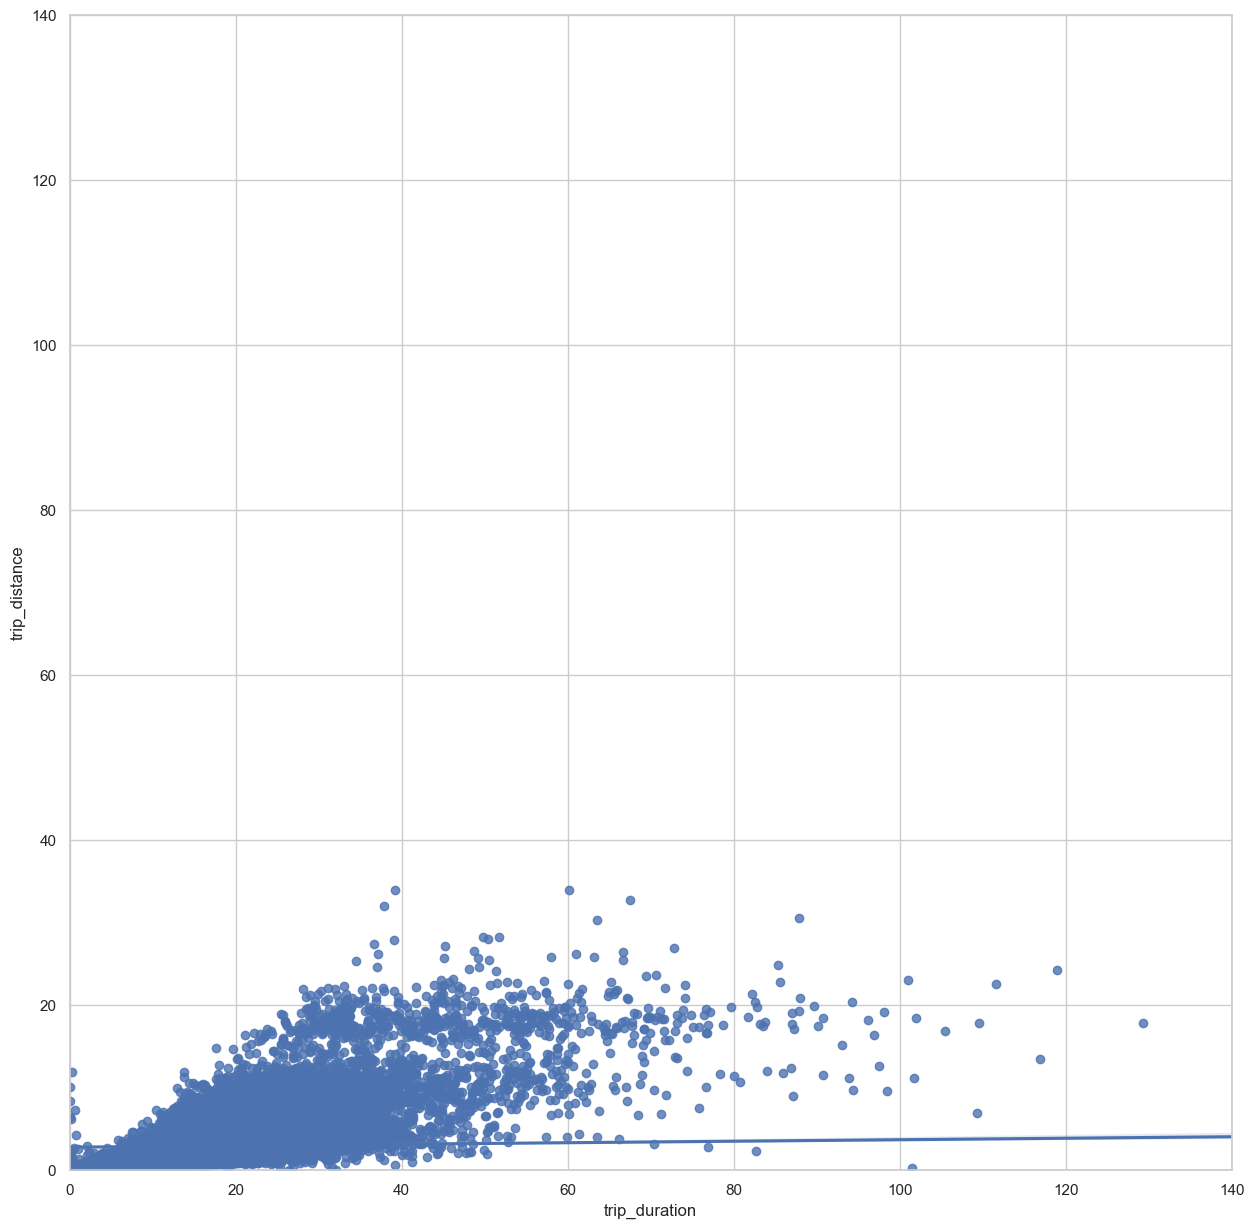

In [29]:
#going to create scatterplot to visualize relationship among variables I am most interested in for analysis
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x=df["trip_duration"], y=df["trip_distance"])
plt.ylim(0, 140)
plt.xlim(0,140)
plt.show()

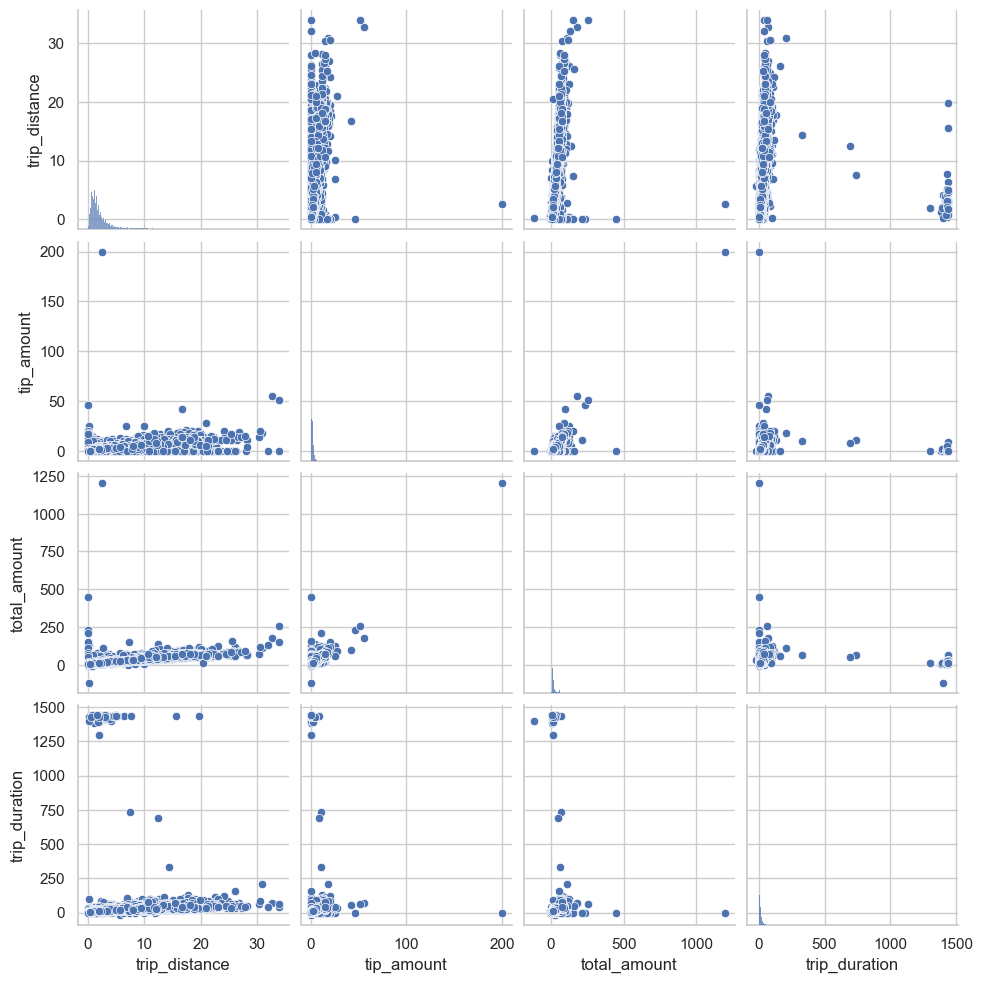

In [30]:
#creating pairplot for further visual exploratory data analysis
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']]);

Text(0.5, 1.0, 'Outlier Investigation')

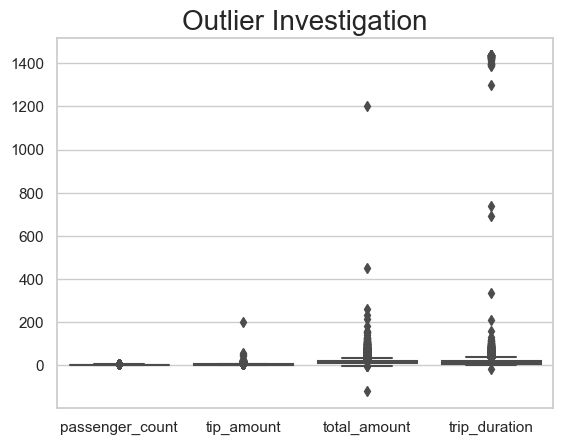

In [31]:
#constructing a boxplot to assess if there are any outliers that could affect analysis endeavors
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=True);
g.set_title("Outlier Investigation",fontsize=20)

Text(0.5, 1.0, 'W/O Outliers Distribution')

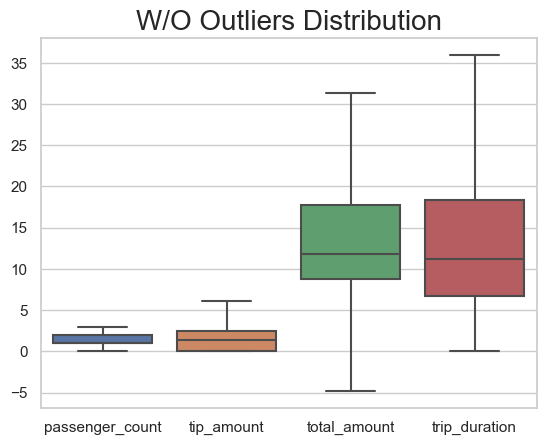

In [32]:
#very clearly some outliers in total amount and trip duration in particular
#creating boxplot to visualize distribution without outliers present
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("W/O Outliers Distribution",fontsize=20)

In [33]:
#going to remove outliers in trip duration
#need to statistically compute what qualifes as an outlier first 
#doing iqr and limit calculations
#computing percentiles 
percentile25 = df["trip_duration"].quantile(0.25)
percentile75 = df["trip_duration"].quantile(0.75)
#computing inner quartile range for trip duration
iqr = percentile75 - percentile25
#calculating upper limits for trip duration
upper_limit = percentile75 + 1.5 * iqr
#displaying result
upper_limit

35.983333333333334

In [34]:
#now, I know what qualifies statistically as an outlier (36)
#now, going to attempt removal process 
df[df["trip_duration"] > 36] = 36 
df[df["trip_duration"] < 0] = 0

In [35]:
#displaying summary stats after removing outliers for trip duration variable 
df["trip_duration"].describe()

count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

In [36]:
#need to do same process but for total amount now 
percentile25 = df["total_amount"].quantile(0.25)
percentile75 = df["total_amount"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
upper_limit

31.375

In [37]:
#now, I know what qualifies statistically as an outlier (32)
#now, going to attempt removal process
df[df["total_amount"] > 32] = 32
df[df["total_amount"] < 0] = 0

In [38]:
#displaying summary stats after removing outliers for total amount variable 
df["total_amount"].describe()

count    22699.000000
mean        14.481228
std          7.985722
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

In [39]:
#going to create correlation matrix to see relationships among variables 
df.corr(method="pearson")

C:\Users\Cameron\AppData\Local\Temp\ipykernel_7140\1543230500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.481317,-0.477442,-0.477195,-0.482017,0.246150,0.251366,-0.481182,-0.388059,-0.481992,-0.482116,-0.477809,-0.482132,-0.482138,-0.351186,-0.311006
VendorID,-0.481317,1.000000,0.991848,0.986482,0.998629,-0.526237,-0.513196,0.997372,0.815431,0.998017,0.998691,0.989050,0.998268,0.998690,0.737951,0.676771
passenger_count,-0.477442,0.991848,1.000000,0.979487,0.991264,-0.521962,-0.508229,0.990162,0.810410,0.990620,0.991338,0.981633,0.990931,0.991338,0.733307,0.673047
trip_distance,-0.477195,0.986482,0.979487,1.000000,0.987527,-0.528553,-0.519552,0.986164,0.888456,0.987172,0.987662,0.985290,0.987733,0.987656,0.822827,0.750085
RatecodeID,-0.482017,0.998629,0.991264,0.987527,1.000000,-0.525975,-0.513027,0.998668,0.816677,0.999239,0.999911,0.990328,0.999531,0.999923,0.739149,0.677597
PULocationID,0.246150,-0.526237,-0.521962,-0.528553,-0.525975,1.000000,0.344806,-0.525536,-0.457266,-0.525978,-0.526041,-0.521739,-0.526066,-0.526072,-0.418361,-0.380025
DOLocationID,0.251366,-0.513196,-0.508229,-0.519552,-0.513027,0.344806,1.000000,-0.512832,-0.456931,-0.513363,-0.512991,-0.510127,-0.513347,-0.513028,-0.421618,-0.380787
payment_type,-0.481182,0.997372,0.990162,0.986164,0.998668,-0.525536,-0.512832,1.000000,0.814424,0.997997,0.998720,0.984290,0.998334,0.998723,0.731241,0.675499
fare_amount,-0.388059,0.815431,0.810410,0.888456,0.816677,-0.457266,-0.456931,0.814424,1.000000,0.816151,0.816518,0.838561,0.817433,0.816525,0.980834,0.941852
extra,-0.481992,0.998017,0.990620,0.987172,0.999239,-0.525978,-0.513363,0.997997,0.816151,1.000000,0.999326,0.989988,0.998916,0.999326,0.740575,0.677547


C:\Users\Cameron\AppData\Local\Temp\ipykernel_7140\503694634.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")


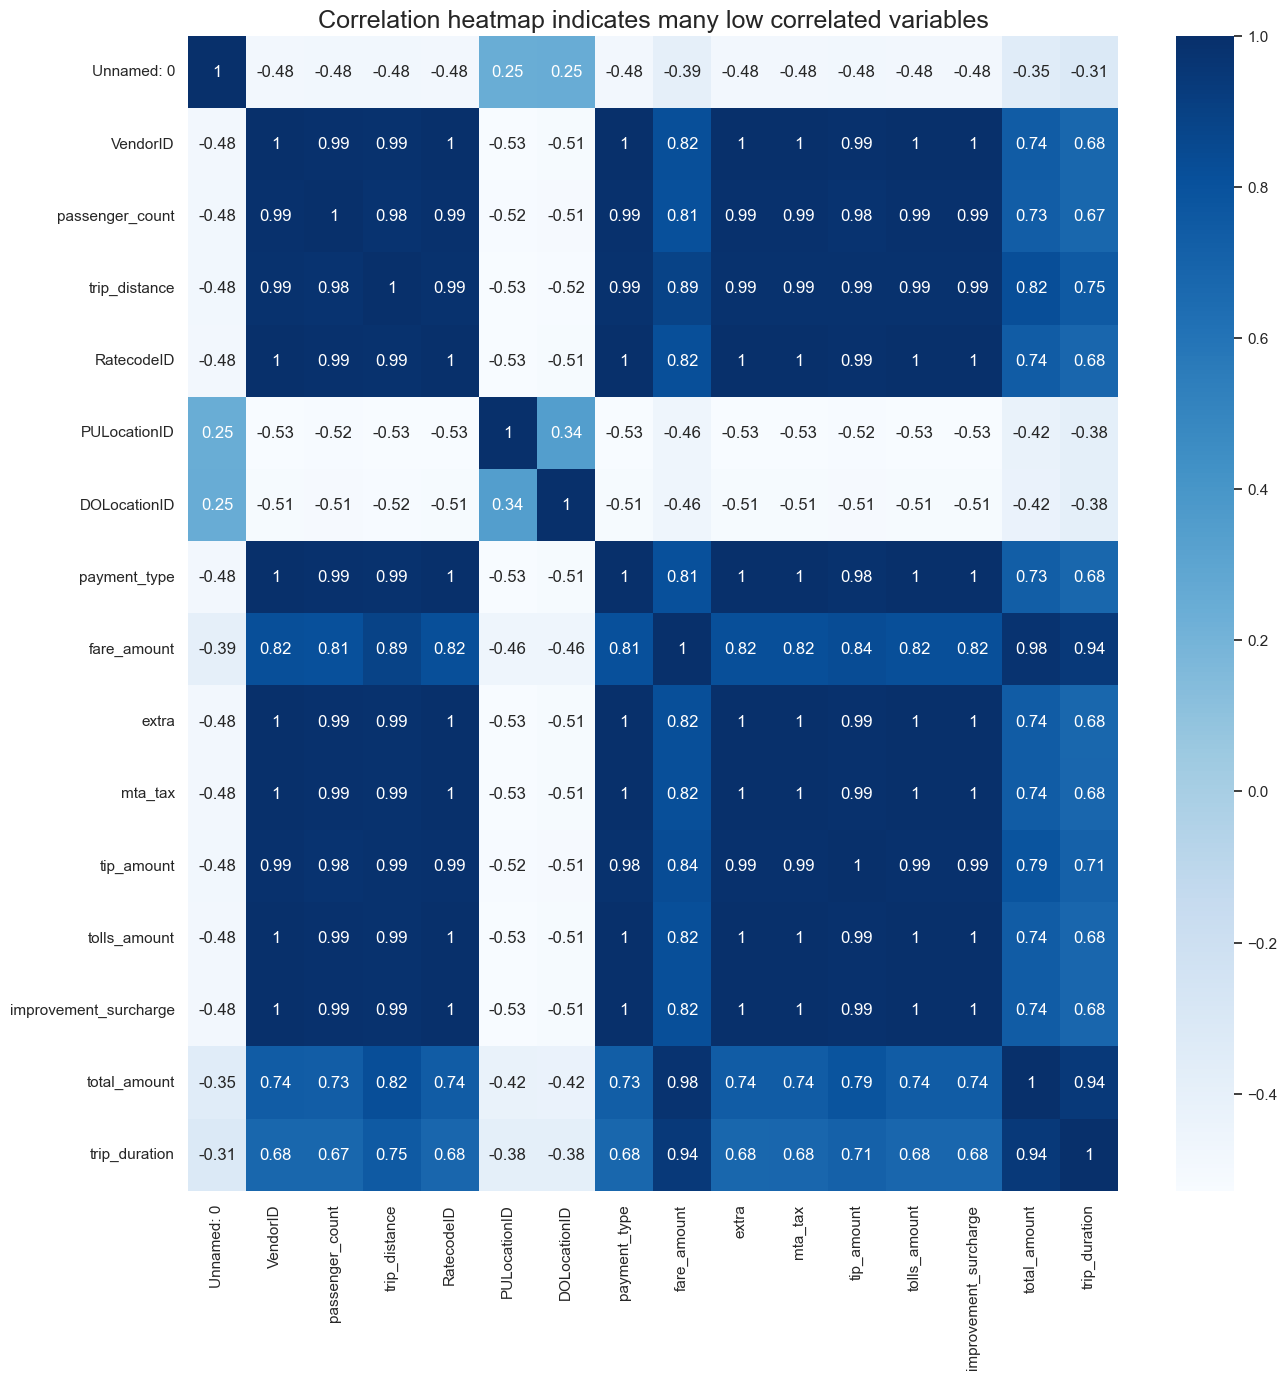

In [40]:
#visualizing correlation matrix via a heatmap 
#determining figure size
plt.figure(figsize=(15,15))
#producing visualization
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")
#titling
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
#displaying heatmap visual
plt.show()

In [41]:
#after investigating heatmap, i am now equipped with what I want my regression model to look like
#selecting outcome variables & explantory variables (features)
#setting y (outcome variable)
Y = df[["trip_duration"]]

In [42]:
#removing target from features
X = df.drop(columns="trip_duration")

In [43]:
#displaying first couple rows to see if operations performed successfully
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20


In [44]:
#pickup and dropoff location ID variables are categorical 
#could create dummies or deal with via one-hot coding
#however, doing so, might make my model prone to overfitting and increasing complexity
#going to keep it simple for now
#considering dropping irrelevant and redudant columns for modeling purposes
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]

In [45]:
#viewing dataframe after pre-processing
X.head()

,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,4.37,1,2,0.5,0.5,0.00,0.0,0.3


In [46]:
#going to standardize X matrix variables bc everything measured differently
#using scaler functionality to standardize/normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#printing results to double check operation performed correctly
print("X scaled:", X_scaled)

X scaled: [[-0.18151313 -0.33715766 -0.37322483 ... -0.18534559 -0.33822608
  -0.33681081]
 [-0.34881939 -0.33715766 -0.37322483 ... -0.05279377 -0.33822608
  -0.33681081]
 [-0.43573173 -0.33715766 -0.37322483 ... -0.32538018 -0.33822608
  -0.33681081]
 ...
 [-0.49874318 -0.33715766 -0.26554074 ... -0.48038029 -0.33822608
  -0.33681081]
 [-0.28798075 -0.33715766 -0.37322483 ... -0.29865602 -0.33822608
  -0.33681081]
 [-0.31622726 -0.33715766 -0.37322483 ... -0.22917321 -0.33822608
  -0.33681081]]


In [48]:
#appears to have scaled correctly, moving on
#creating training & testing datasets to improve model performance potentially 
#adding random state for reproducability and best practice due dillegence
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,  test_size=0.2, random_state=0)

In [49]:
#building model with respect to training data
lr=LinearRegression()

In [50]:
#fitting model with respect to training data
lr.fit(X_train,Y_train)

LinearRegression()

In [51]:
#evaluating model performance on training data with appropiate metrics
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.7452534633044858
R^2: 0.7452534633044858
MAE: 3.220750292522748
RMSE: 4.5859932427873025


In [52]:
#doing the same, but for testing data subset
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.7385047347008926
R^2: 0.7385047347008926
MAE: 3.2347404963476953
RMSE: 4.610361359561369


In [53]:
#getting actual, predicted, and residuals for testing set
results = pd.DataFrame(data={"actual": Y_test["trip_duration"],
                             "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]

In [54]:
#viewing results
results.head()

,actual,predicted,residual
5818,18.016667,15.655547,2.361120
18134,32.000000,32.000124,-0.000124
4655,5.883333,7.340598,-1.457264
7378,15.950000,18.320577,-2.370577
13914,11.900000,11.538481,0.361519


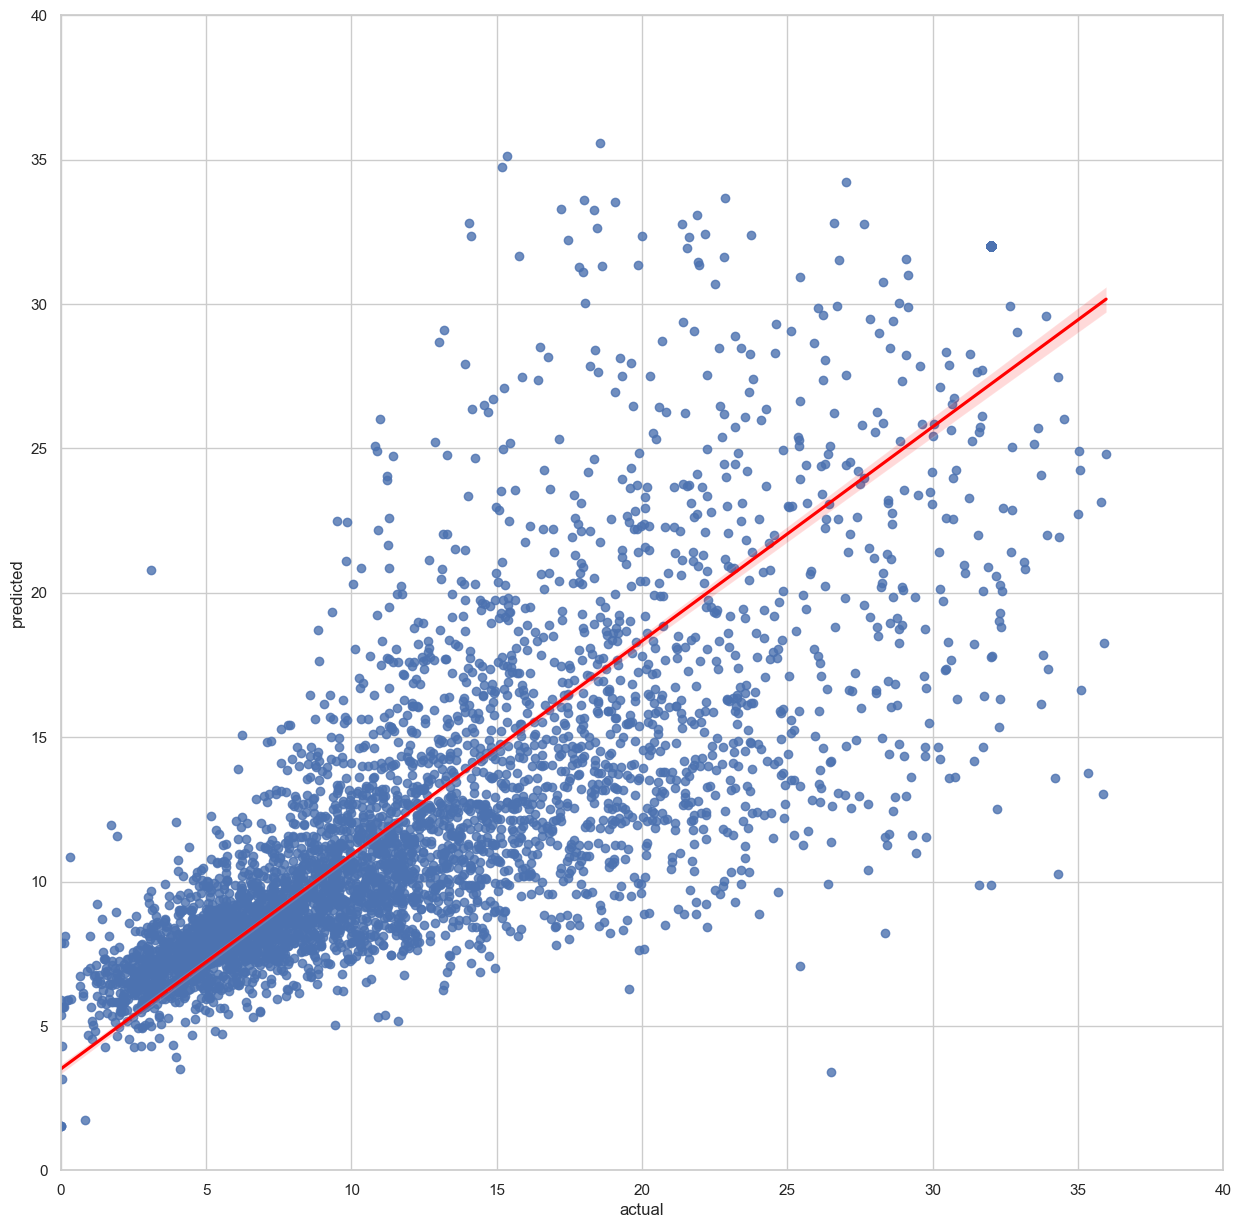

In [55]:
#visualizing regression model results via scatterplot with predicted over actual 
#setting background
sns.set(style='whitegrid')
#defining new data frame for ease of use
f = plt.figure()
#defining figure dimensions
f.set_figwidth(15)
f.set_figheight(15)
#constructing visual
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
#defining axis dimensions
plt.ylim(0, 40)
plt.xlim(0,40)
#displaying visual
plt.show()

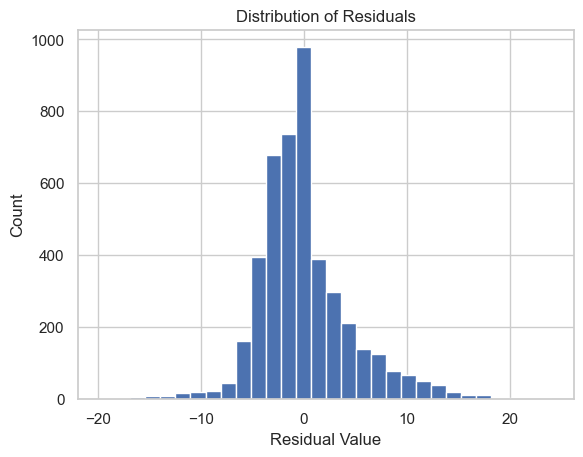

In [56]:
#going to visualize distribution of residual values next
#creating histogram graph
#binning residuals
plt.hist(results["residual"], bins=30)
#titling graph
plt.title("Distribution of Residuals")
#labels
plt.xlabel("Residual Value")
plt.ylabel("Count")
#displaying visual
plt.show()

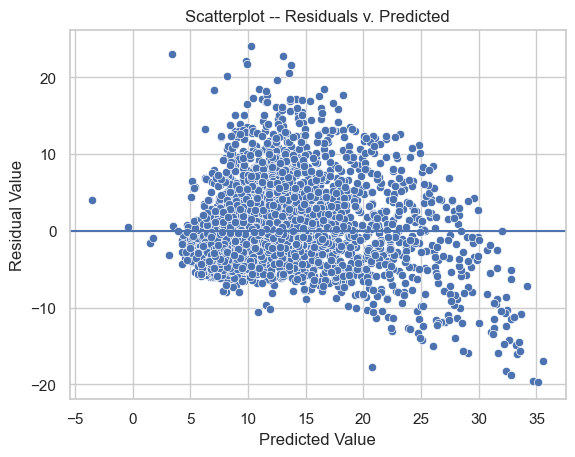

In [57]:
#normality assumptions seems to have been met from the following visualization
#checking for homoscedasticity next
#creating scatterplot of residuals relative to predicted values
#creating scatterplot with seaborn
sns.scatterplot(x="predicted", y="residual", data=results)
#creating zero axis line
plt.axhline(0)
#titling
plt.title("Scatterplot -- Residuals v. Predicted")
#labels
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")
#displaying graph
plt.show()

In [ ]:
#random cloud shape confirms homoscedasticity assumption met 